In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df = pd.read_csv("Global Methane Emission 1990~2019.csv", parse_dates=["Year"])

In [34]:
df["Year"] = pd.to_datetime(df.Year, format="%Y")
data = df.drop(["Year"], axis=1)
data.index = df.Year

In [35]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(data.drop("Value", axis=1), -1, 1).eig

array([], dtype=float64)

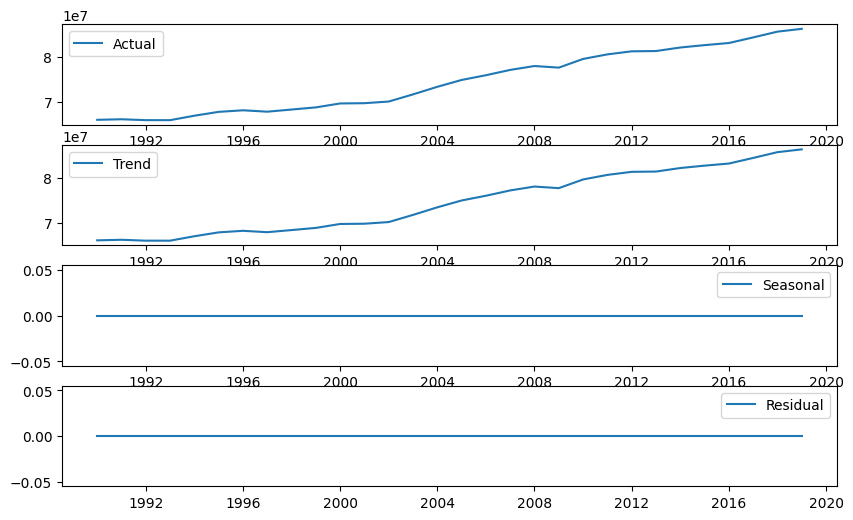

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decom=seasonal_decompose(data["Value"])
dftend=decom.trend
dfsea=decom.seasonal
dfres=decom.resid
plt.figure(figsize=(10,6))
plt.subplot (411)
plt.plot(data,label='Actual')
plt.legend()
plt.subplot (412)
plt.plot(dftend,label='Trend')
plt.legend()
plt.subplot (413)
plt.plot(dfsea,label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(dfres, label='Residual')
plt.legend()

In [37]:
from pmdarima.arima import auto_arima

model = auto_arima(data["Value"], information_criterion="aic", trace=True, error_action="warn")

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=859.649, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=857.261, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=861.198, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=858.498, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=880.423, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=860.489, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.292 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -426.631
Date:                Sat, 17 Dec 2022   AIC                            857.261
Time:                        06:41:24   BIC                            859.996
Sample:                    01-01-1990   HQIC                           858.118
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.963e+05   1.11e+05      6.299      0.000     4.8e+05    9.13e+05
sigma2      3.513e+11   1.15e+11      3.052      0.002    1.26e+11    5.77e+11
===================================================================================
Ljung-Box (L1) (Q):                   2.07   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.15   Prob(JB):                         0.72
Heteroskedasticity (H):               0.92   Skew:                             0.11
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
size = int(len(data) * 0.75)

Xtrain, Xtest = data[0:size], data[size:]

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(Xtrain["Value"], order=(0, 1, 0))
result = model.fit()

testprid = pd.DataFrame(result.predict(start=len(Xtrain), end=len(data)))
testprid.columns = ['Prediction']

data = pd.concat((data, testprid), axis=1)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.44971D+01    |proj g|=  4.88500D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   4.885D-08   1.450D+01
  F =   14.497097976862813     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


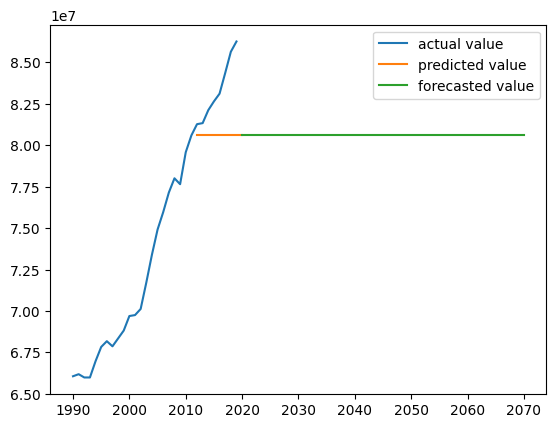

In [40]:
yhat = result.predict(start="2019-03-01", end="2070-01-01")

plt.plot(data.index, data["Value"], label="actual value")
plt.plot(data.index, data["Prediction"], label="predicted value")
plt.plot(pd.DataFrame(yhat), label="forecasted value")

plt.legend()